In [5]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings("ignore")

In [7]:
import os
print(os.getcwd())

/Users/mydream/Desktop/PGDSAI/codes/kaggle pjt/Insurance Dataset


In [8]:
dataset_path = "/Users/mydream/Desktop/PGDSAI/codes/kaggle pjt/Insurance Dataset/"


train_db = pd.read_csv(dataset_path +'train.csv')
test_db = pd.read_csv(dataset_path +'test.csv')


sample_db = pd.read_csv(dataset_path + "sample_submission.csv")

In [9]:
print("Train Keys: ", train_db.keys())

print("Test Keys: ", test_db.keys())

print("Sample Keys: ", sample_db.keys())

Train Keys:  Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
Test Keys:  Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')
Sample Keys:  Index(['id', 'Premium Amount'], dtype='object')


In [10]:
# check the shape of all the datasets:

print("Train Data Shape: ", train_db.shape)

print("Test Data Shape: ", test_db.shape)

print("Sample Data Shape: ", sample_db.shape)

Train Data Shape:  (1200000, 21)
Test Data Shape:  (800000, 20)
Sample Data Shape:  (800000, 2)


In [11]:
# chak the train datadet:

train_db.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [12]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [13]:
train_db.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [14]:
# check the test dataset:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [15]:
test_db.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
count,8.000000e+05,787511.000000,770140.000000,726870.000000,750551.000000,557198.000000,799997.000000,708549.000000,799998.000000
mean,1.600000e+06,41.136440,32803.871471,2.009337,25.613036,1.004873,9.571891,592.904749,5.018949
std,2.309403e+05,13.537829,32201.063749,1.415241,12.206882,0.982803,5.772200,150.116374,2.593759
min,1.200000e+06,18.000000,2.000000,0.000000,1.646561,0.000000,0.000000,300.000000,1.000000
25%,1.400000e+06,30.000000,8048.000000,1.000000,15.917353,0.000000,5.000000,468.000000,3.000000
50%,1.600000e+06,41.000000,23981.000000,2.000000,24.580164,1.000000,10.000000,595.000000,5.000000
75%,1.799999e+06,53.000000,44660.000000,3.000000,34.517766,2.000000,15.000000,721.000000,7.000000
max,1.999999e+06,64.000000,149997.000000,4.000000,57.957351,9.000000,19.000000,849.000000,9.000000


*Understand the structure and relationship between the datasets:

train_db: Typically contains features and a target variable for training.

test_db: Features without the target variable (for predictions).

sample_db: Shows the expected format for predictions.

--------------------

*Key observations from the dataset:

--> Both datasets have missing values, especially in critical columns like Age, Annual Income, Number of Dependents, and Occupation.

--> Many categorical features (Gender, Marital Status, Policy Type, etc.) and a mix of numerical features (Health Score, Credit Score, Vehicle Age, etc.).

In [16]:
#check the null values in the train database:

train_db.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [17]:
#check the null values in the train database:

test_db.isnull().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [18]:
# Assuming train_db and test_db are your DataFrames
train_nulls = train_db.isnull().sum()
test_nulls = test_db.isnull().sum()

# Create a DataFrame to display them side by side
null_summary = pd.DataFrame({
    'Train Nulls': train_nulls,
    'Test Nulls': test_nulls
})

# Display the DataFrame
null_summary

,Train Nulls,Test Nulls
Age,18705,12489.0
Annual Income,44949,29860.0
Credit Score,137882,91451.0
Customer Feedback,77824,52276.0
Education Level,0,0.0
Exercise Frequency,0,0.0
Gender,0,0.0
Health Score,74076,49449.0
Insurance Duration,1,2.0
Location,0,0.0


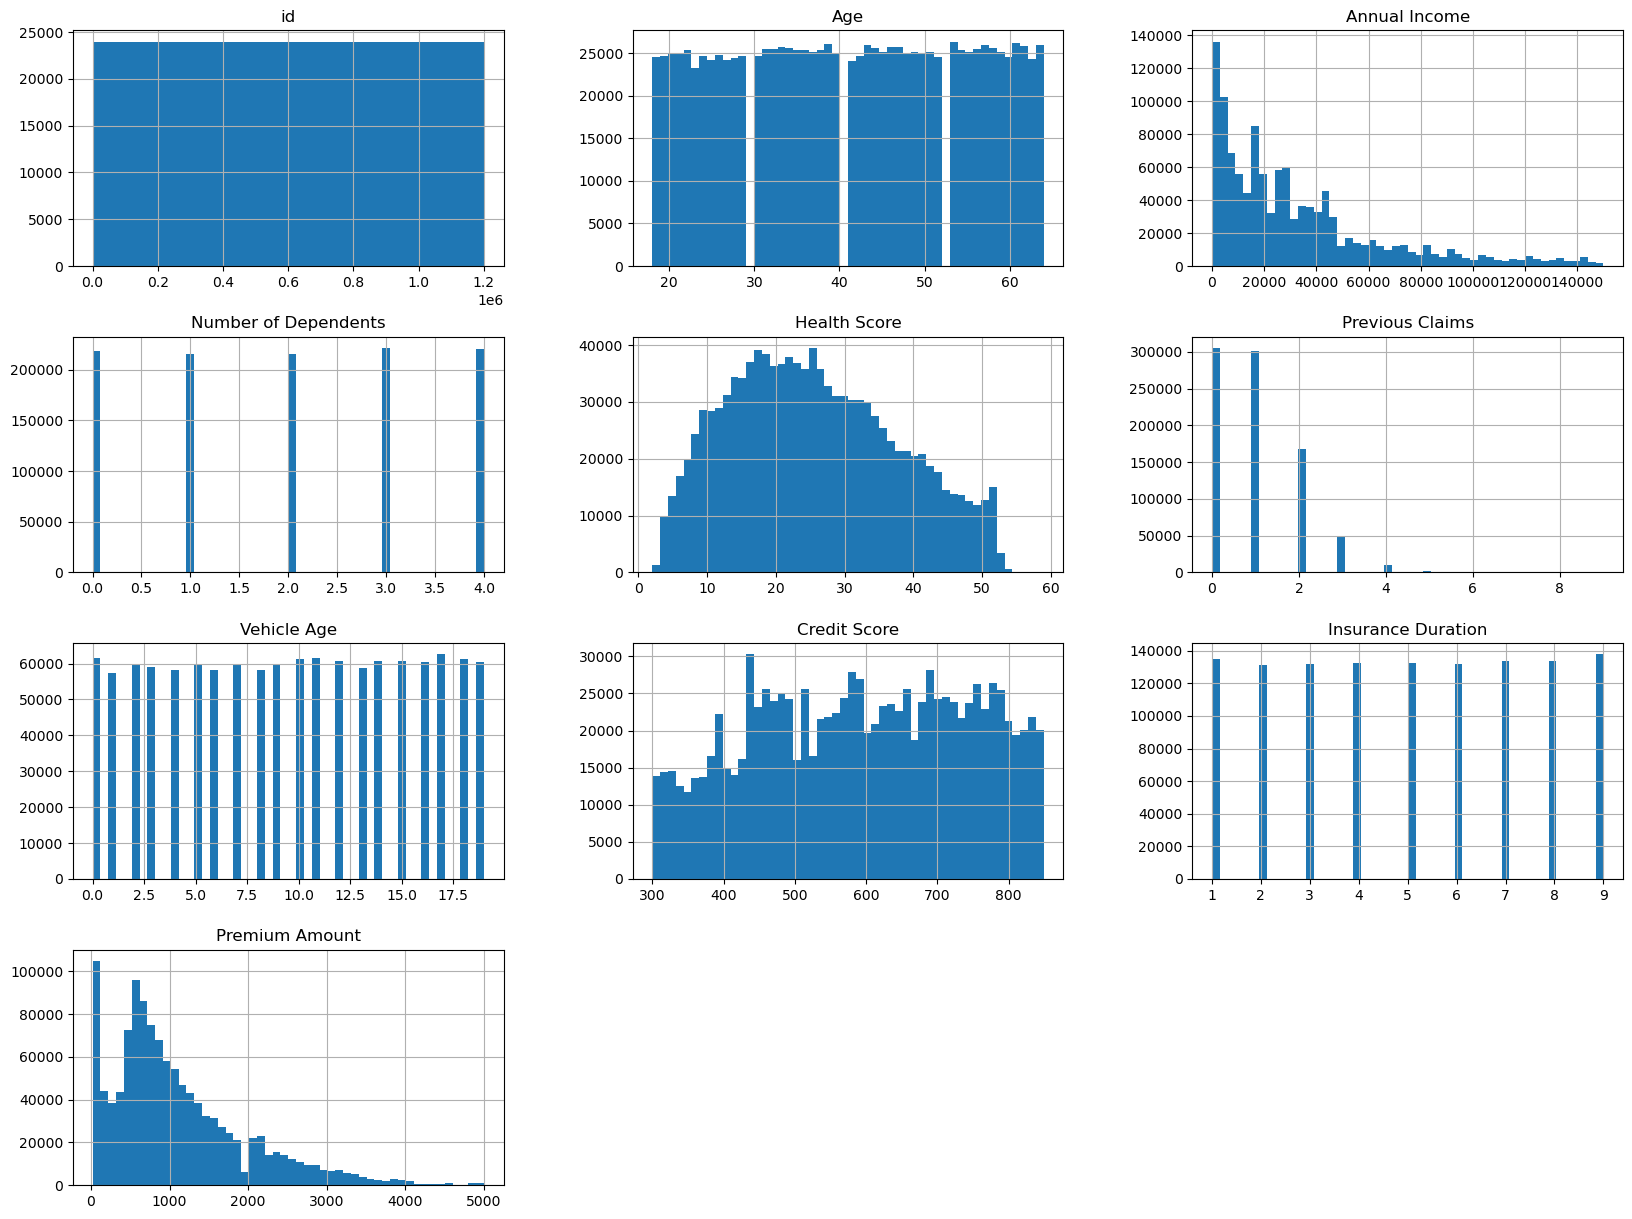

In [19]:
train_db.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
print("Train Dataset Summary:")
print(train_db.describe(include='all'))


Train Dataset Summary:
                  id           Age   Gender  Annual Income Marital Status  \
count   1.200000e+06  1.181295e+06  1200000   1.155051e+06        1181471   
unique           NaN           NaN        2            NaN              3   
top              NaN           NaN     Male            NaN         Single   
freq             NaN           NaN   602571            NaN         395391   
mean    5.999995e+05  4.114556e+01      NaN   3.274522e+04            NaN   
std     3.464103e+05  1.353995e+01      NaN   3.217951e+04            NaN   
min     0.000000e+00  1.800000e+01      NaN   1.000000e+00            NaN   
25%     2.999998e+05  3.000000e+01      NaN   8.001000e+03            NaN   
50%     5.999995e+05  4.100000e+01      NaN   2.391100e+04            NaN   
75%     8.999992e+05  5.300000e+01      NaN   4.463400e+04            NaN   
max     1.199999e+06  6.400000e+01      NaN   1.499970e+05            NaN   

        Number of Dependents Education Level Occupat

In [21]:
print("\nTest Dataset Summary:")
print(test_db.describe(include='all'))


Test Dataset Summary:
                  id            Age  Gender  Annual Income Marital Status  \
count   8.000000e+05  787511.000000  800000  770140.000000         787664   
unique           NaN            NaN       2            NaN              3   
top              NaN            NaN    Male            NaN         Single   
freq             NaN            NaN  401089            NaN         263705   
mean    1.600000e+06      41.136440     NaN   32803.871471            NaN   
std     2.309403e+05      13.537829     NaN   32201.063749            NaN   
min     1.200000e+06      18.000000     NaN       2.000000            NaN   
25%     1.400000e+06      30.000000     NaN    8048.000000            NaN   
50%     1.600000e+06      41.000000     NaN   23981.000000            NaN   
75%     1.799999e+06      53.000000     NaN   44660.000000            NaN   
max     1.999999e+06      64.000000     NaN  149997.000000            NaN   

        Number of Dependents Education Level Occupat

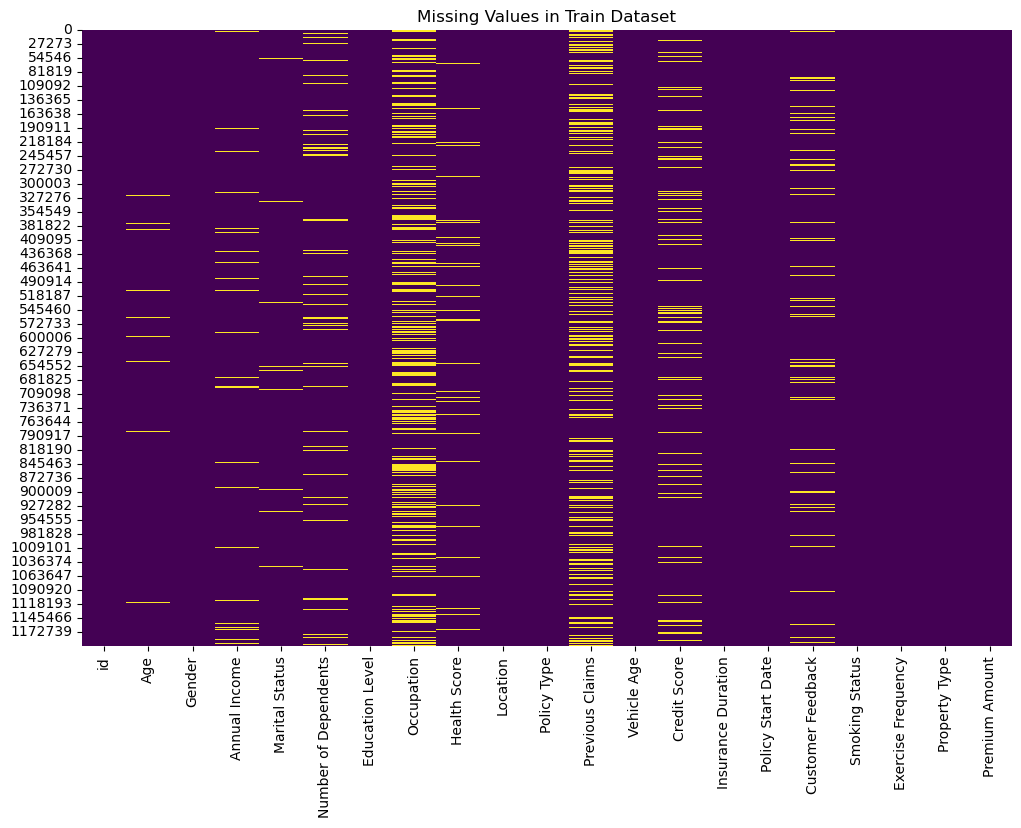

In [22]:
# graphical view of missing data in the train dataset:


plt.figure(figsize=(12, 8))
sns.heatmap(train_db.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Train Dataset")
plt.show()

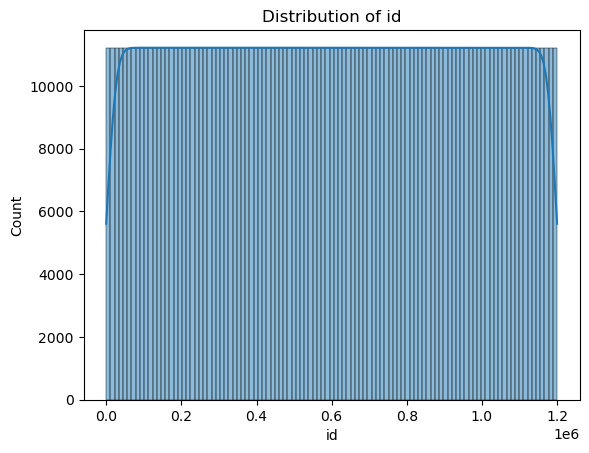

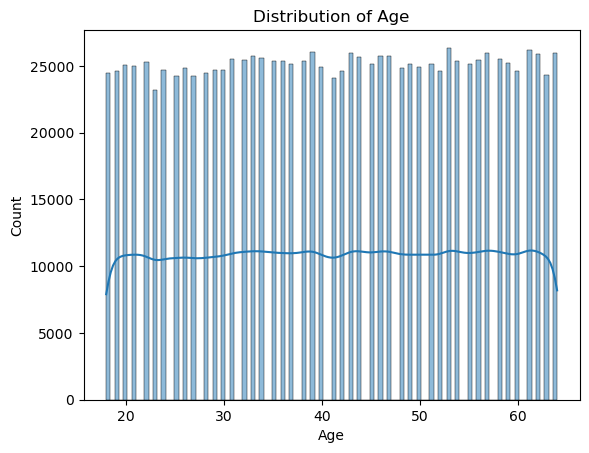

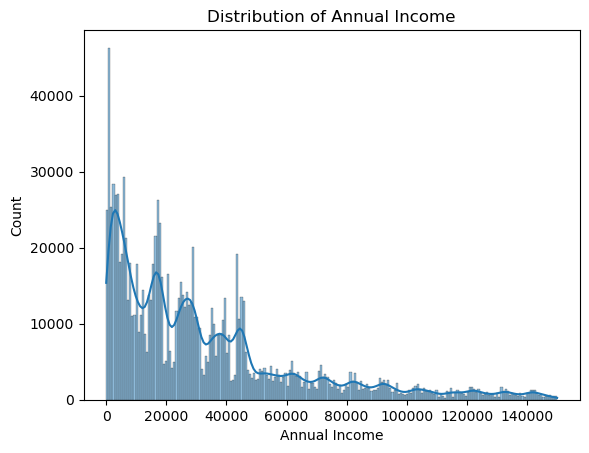

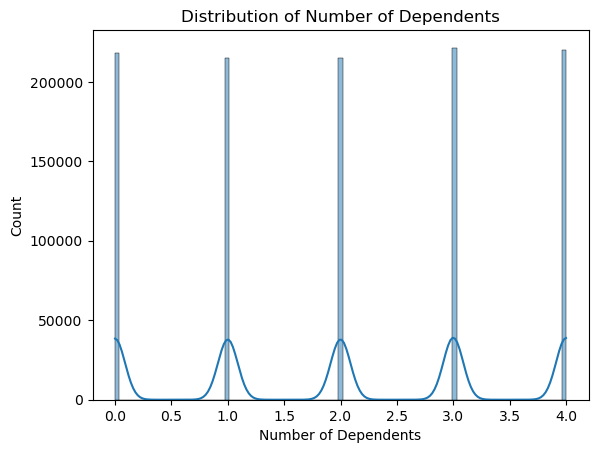

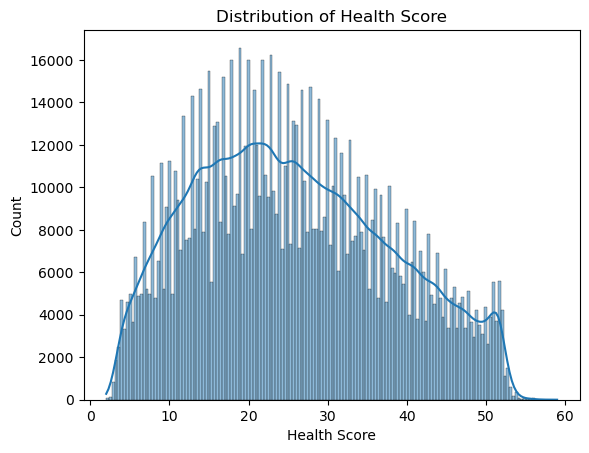

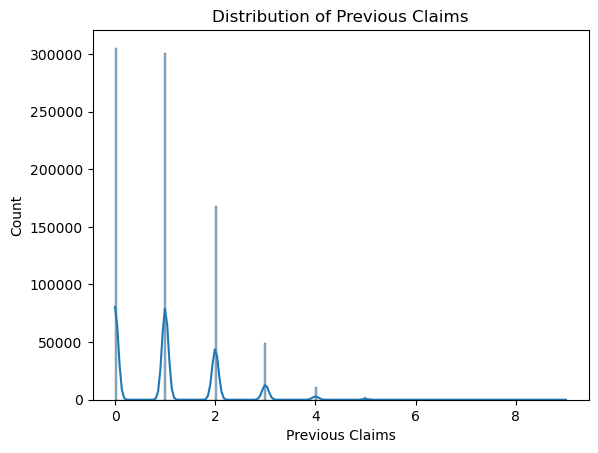

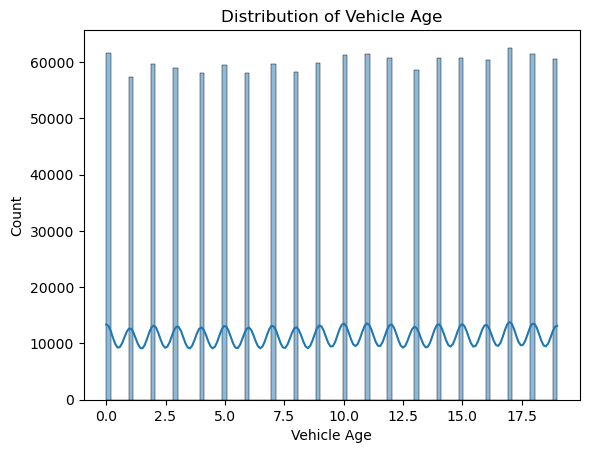

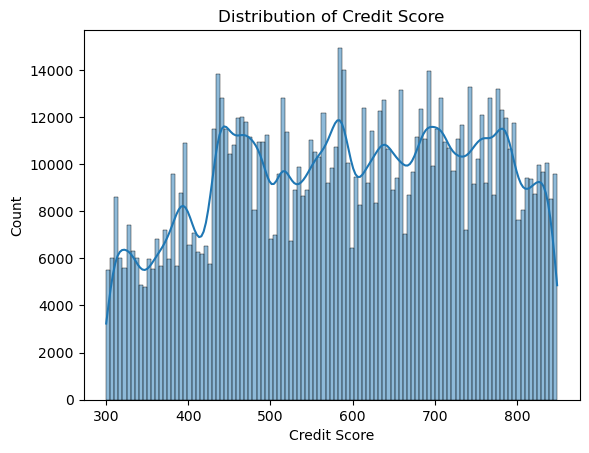

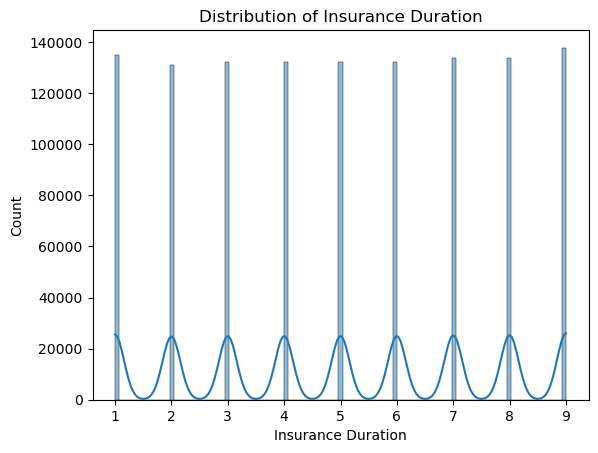

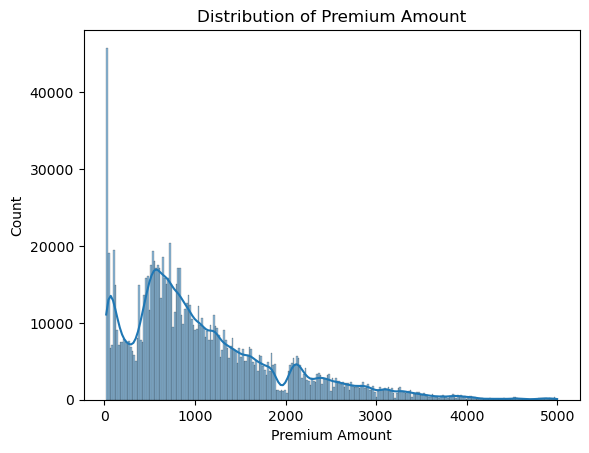

In [23]:
# Numerical feature distribution
num_cols = train_db.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    sns.histplot(train_db[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

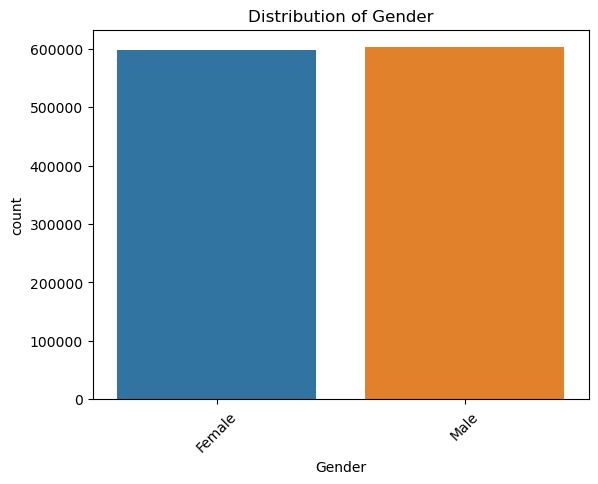

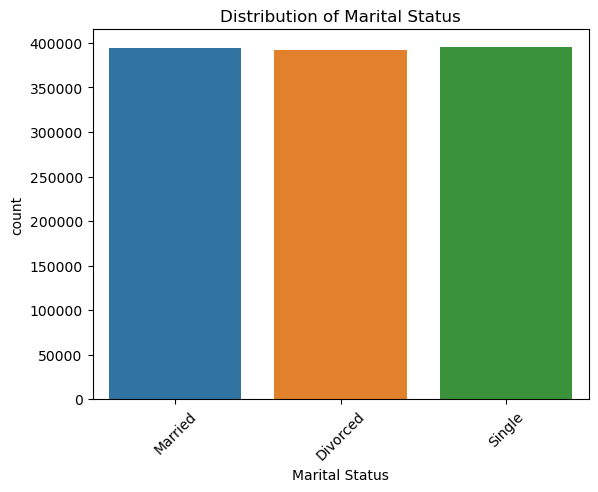

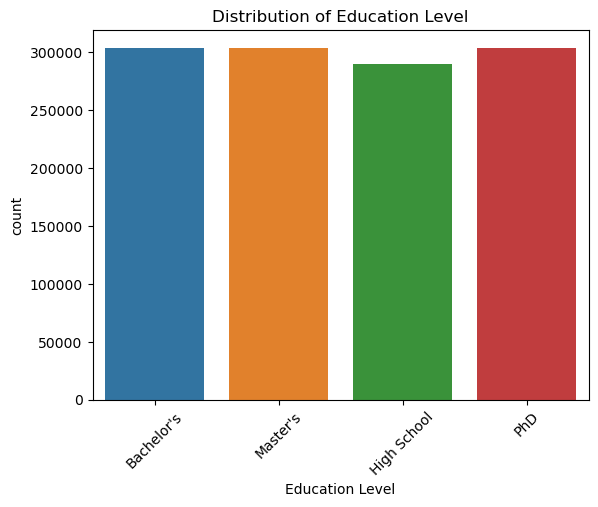

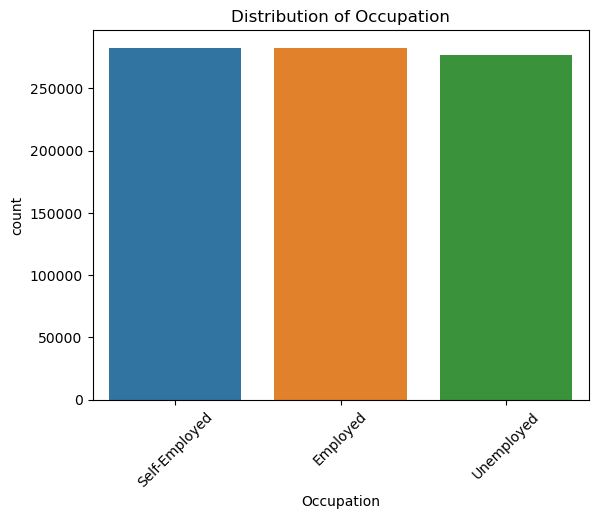

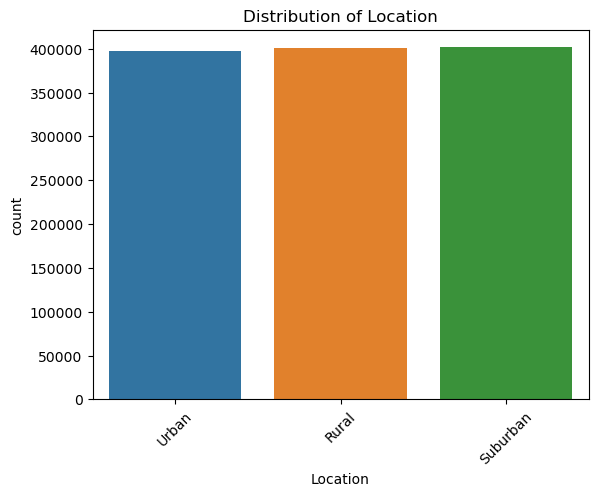

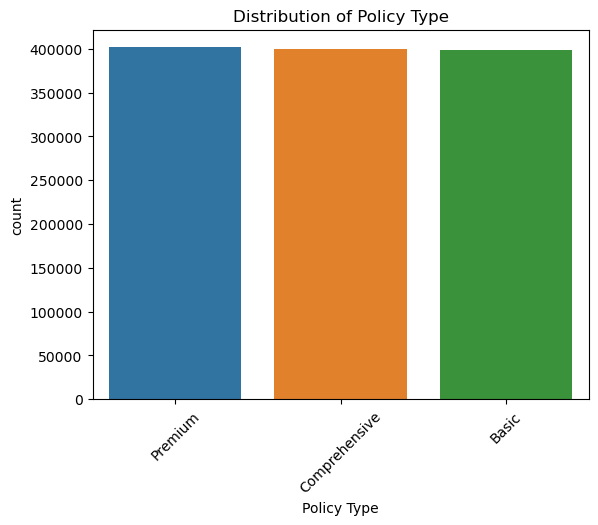

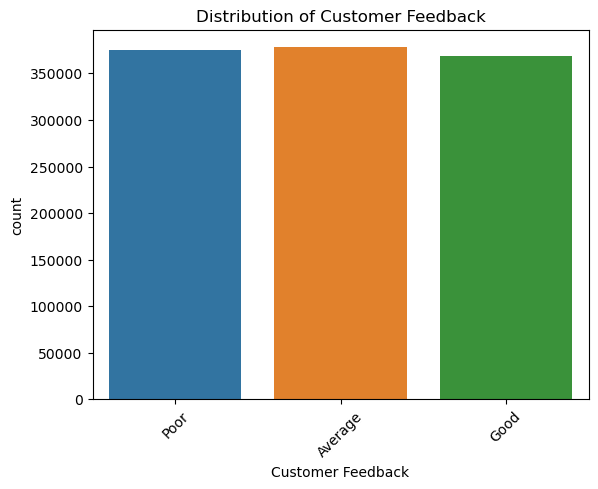

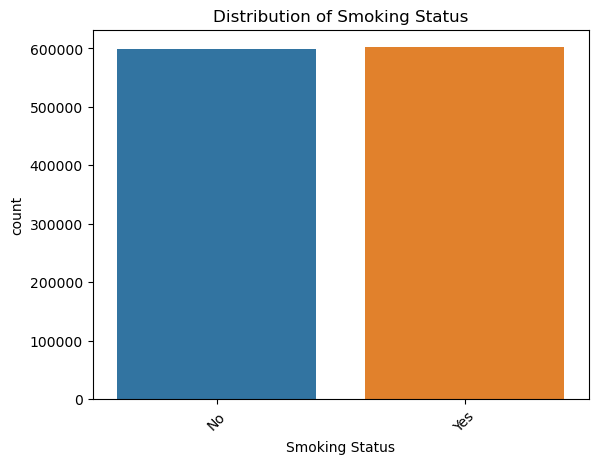

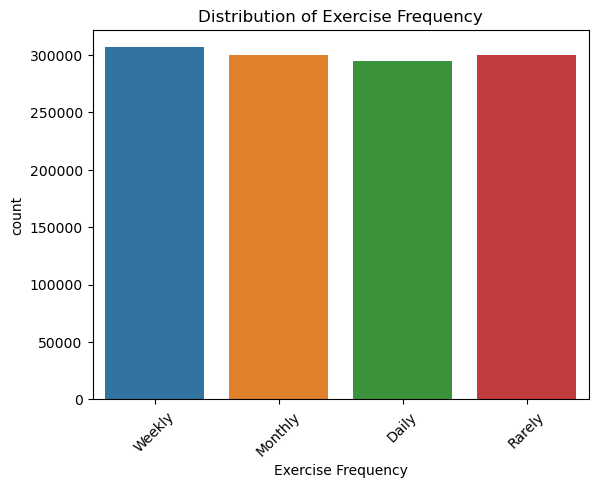

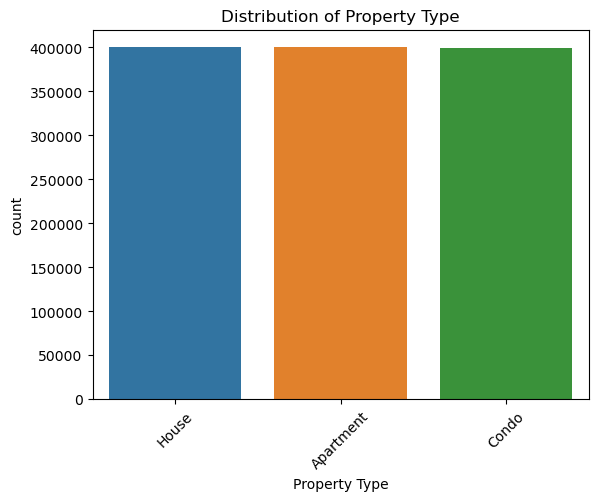

In [24]:
# Categorical feature distribution
cat_cols = train_db.drop(columns=['Policy Start Date'])
cat_cols = cat_cols.select_dtypes(include=['object']).columns

for col in cat_cols:
    sns.countplot(x=col, data=train_db)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

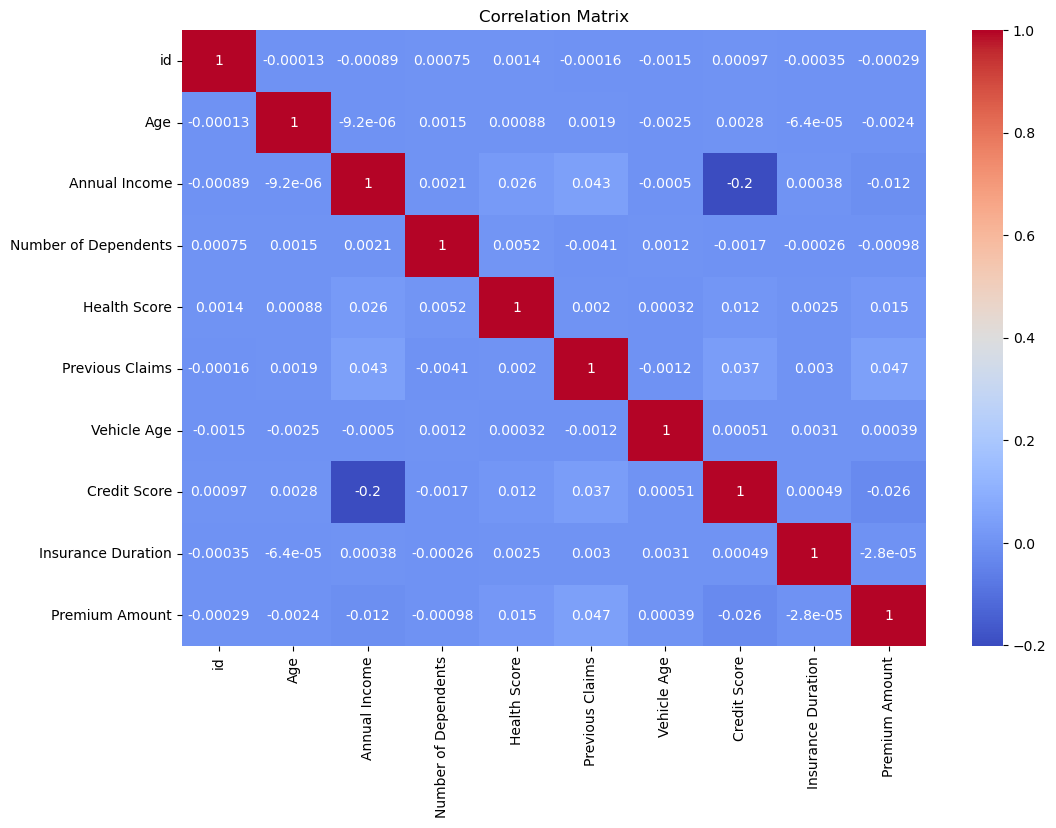

In [25]:
#corelation float / int data
obj_data_type = train_db.select_dtypes(include=['object']).columns

num_datas = train_db.drop(columns=obj_data_type)

plt.figure(figsize=(12, 8))
sns.heatmap(num_datas.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [26]:
# fill the null values

In [27]:
num_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Credit Score', 'Vehicle Age', 'Insurance Duration']
for col in num_cols:
    train_db[col].fillna(train_db[col].median(), inplace=True)

train_db['Annual Income'].fillna(train_db['Annual Income'].mean(), inplace=True)

train_db['Previous Claims'].fillna(0, inplace=True)

cat_cols = ['Marital Status', 'Occupation', 'Customer Feedback']
for col in cat_cols:
    train_db[col].fillna(train_db[col].mode()[0], inplace=True)

train_db['Occupation'].fillna('Unknown', inplace=True)


In [28]:
import datetime

# Convert to datetime
train_db['Policy Start Date'] = pd.to_datetime(train_db['Policy Start Date'])

# Extract year, month, day, etc.
train_db['Policy Start Year'] = train_db['Policy Start Date'].dt.year
train_db['Policy Start Month'] = train_db['Policy Start Date'].dt.month
train_db['Policy Start Day'] = train_db['Policy Start Date'].dt.day


# Calculate days since policy start
current_date = datetime.datetime.now()
train_db['Days Since Policy Start'] = (current_date - train_db['Policy Start Date']).dt.days

print(train_db[['Policy Start Year', 'Policy Start Month','Policy Start Day', 'Days Since Policy Start']].head())

# Convert datetime to integer (nanoseconds since epoch) in place
train_db['Policy Start Date'] = train_db['Policy Start Date'].view('int64')


   Policy Start Year  Policy Start Month  Policy Start Day  \
0               2023                  12                23   
1               2023                   6                12   
2               2023                   9                30   
3               2024                   6                12   
4               2021                  12                 1   

   Days Since Policy Start  
0                      371  
1                      565  
2                      455  
3                      199  
4                     1123  


In [29]:
train_db.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Start Year,Policy Start Month,Policy Start Day,Days Since Policy Start
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,1703344899134960000,Poor,No,Weekly,House,2869.0,2023,12,23,371
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,...,1686583299111551000,Average,Yes,Monthly,House,1483.0,2023,6,12,565
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1696087299221386000,Good,Yes,Weekly,House,567.0,2023,9,30,455
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Employed,10.938144,Rural,...,1718205699226954000,Poor,Yes,Daily,Apartment,765.0,2024,6,12,199
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,1638372099252145000,Poor,Yes,Weekly,House,2022.0,2021,12,1,1123


In [30]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1200000 non-null  int64  
 1   Age                      1200000 non-null  float64
 2   Gender                   1200000 non-null  object 
 3   Annual Income            1200000 non-null  float64
 4   Marital Status           1200000 non-null  object 
 5   Number of Dependents     1200000 non-null  float64
 6   Education Level          1200000 non-null  object 
 7   Occupation               1200000 non-null  object 
 8   Health Score             1200000 non-null  float64
 9   Location                 1200000 non-null  object 
 10  Policy Type              1200000 non-null  object 
 11  Previous Claims          1200000 non-null  float64
 12  Vehicle Age              1200000 non-null  float64
 13  Credit Score             1200000 non-null 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
# categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation',
#                     'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status',
#                     'Exercise Frequency', 'Property Type']

categorical_cols = ['Gender', 'Marital Status', 'Smoking Status','Exercise Frequency']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_db[col] = label_encoder.fit_transform(train_db[col]).astype(float)


In [ ]:
train_db.head()

In [ ]:
# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(train_db, 1):
    plt.subplot(5,5, i)  # Adjust the grid size based on the number of columns
    train_db[col].hist(bins=30, grid=False)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(22, 22))
#sns.heatmap(train_db.corr(), annot=True, cmap='coolwarm')

sns.heatmap(train_db.corr(), cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 8})

plt.title("Correlation Matrix")
plt.show()

In [34]:
# Select only numeric columns
df = train_db
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Remove columns with constant values
df = df.loc[:, (df != df.iloc[0]).any()]

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Female'

In [35]:
print(df.dtypes)


id                           int64
Age                        float64
Gender                      object
Annual Income              float64
Marital Status              object
Number of Dependents       float64
Education Level             object
Occupation                  object
Health Score               float64
Location                    object
Policy Type                 object
Previous Claims            float64
Vehicle Age                float64
Credit Score               float64
Insurance Duration         float64
Policy Start Date            int64
Customer Feedback           object
Smoking Status              object
Exercise Frequency          object
Property Type               object
Premium Amount             float64
Policy Start Year            int32
Policy Start Month           int32
Policy Start Day             int32
Days Since Policy Start      int64
dtype: object
